# Adversarial Images for MNIST

## Build and Train Model

This session for building and training the model is credited to: http://docs.seldon.io/tensorflow-deep-mnist-example.html

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [327]:
import tensorflow as tf
sess = tf.InteractiveSession()

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

def max_pooling_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


This is a simple CNN network with two convolution layers. The input images is 28\*28 and after two max pooling layers, it becomes 7\*7. 

In [328]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

x_image = tf.reshape(x, [-1,28,28,1])

# First convolution layer with 32 filters
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pooling_2x2(h_conv1)

# Second convolution layer with 64 filters
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pooling_2x2(h_conv2)

# size: 28 / 2 / 2 = 7
h_flat = tf.reshape(h_pool2, [-1, 7*7*64])

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
h_fc1 = tf.nn.relu(tf.matmul(h_flat, W_fc1) + b_fc1)

# Dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# Classification layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

y = tf.nn.softmax(y_conv)

# Loss function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())

In [332]:
for i in range(51):
    batch = mnist.train.next_batch(100)
    if i%50 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))

    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.4})

step 0, training accuracy 0.91
step 50, training accuracy 0.96


The following code is written by myself unless otherwise specified

In [205]:
#get all the images with digit 2
x_2_train = []

for i in range(n):
    if list(mnist.train.labels[i]).index(1) == 2:
        x_2_train.append(mnist.train.images[i])

#convert it into ndarray
x_2_train_array = np.asarray(x_2_train)

In [382]:
# get the predicted labels and confidence for each image
def predict_labels_confidence(image):
    pred = y.eval(feed_dict={x: image, keep_prob: 1.0})
    pred_list = list(pred[0])
    
    return [pred_list.index(max(pred_list)), max(pred_list)]

In [389]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid, ImageGrid
from numpy.random import rand

def plot_images(original_image, delta_image, adversarial_image, labels_confidence):
    
    original_image = original_image.reshape((28, 28))
    delta_image = delta_image.reshape((28, 28))
    adversarial_image = adversarial_image.reshape((28, 28))
    
    fig = plt.figure(1, (12., 12.))

    grid = ImageGrid(fig, 111,
                    nrows_ncols = (1, 3),
                    axes_pad = 0.07,
                    share_all=True,
                    label_mode = "L",
                    aspect = True
                    )

    grid[0].imshow(original_image, cmap = 'gray')
    grid[0].set_title('Original Image \n Label: {0} \n Confidence: {1}'.format(labels_confidence[0][0], labels_confidence[0][1]))
    
    grid[1].imshow(delta_image, cmap = 'gray')
    grid[1].set_title('Delta Image \n Label: {0} \n Confidence: {1}'.format(labels_confidence[1][0], labels_confidence[1][1]))
    
    grid[2].imshow(adversarial_image, cmap = 'gray')
    grid[2].set_title('Adversarial Image \n Label: {0} \n Confidence: {1}'.format(labels_confidence[2][0], labels_confidence[2][1]))
    
    grid.axes_all
    plt.show()

This website helps me to understand how to generate adversarial images (https://ml.berkeley.edu/blog/2018/01/10/adversarial-examples/) and it is stated very clearly. From my point of understanding, basically, it is about minimizing the loss between goal label (in this case it is label 6) and the output of the network. This is a problem of calculating the gradient which is very similar to Gradient Descent. Therefore, we need to calculate the derivatives of the loss function with respect to the input. The code for calculating the adversarial image is credit to this website (https://github.com/jasonicarter/MNIST-adversarial-images/blob/master/MNIST-adversarial-images.ipynb)

In [390]:
def create_plot_adversarial_images(x_image, y_label, lr=0.1, n_steps=1):
    x_image = np.reshape(x_image, (1, 784))
    
    original_image = x_image
    probs_per_step = []
    
    loss =  tf.nn.softmax_cross_entropy_with_logits(labels=y_label, logits=y_conv)
    deriv = tf.gradients(loss, x)
    image_adv = tf.stop_gradient(x - tf.sign(deriv)*lr/n_steps)
    image_adv = tf.clip_by_value(image_adv, 0, 1)
    
    for _ in range(n_steps):
        # Calculate derivative and adversarial image
        dydx = sess.run(deriv, {x: x_image, keep_prob: 1.0})
        x_adv = sess.run(image_adv, {x: x_image, keep_prob: 1.0})
        
        x_image = np.reshape(x_adv, (1, 784))
    
    labels_confidence = []
    
    labels_confidence.append(predict_labels_confidence(original_image))
    labels_confidence.append(predict_labels_confidence(dydx[0]))
    labels_confidence.append(predict_labels_confidence(x_image))
    
    plot_images(original_image, dydx[0], x_image, labels_confidence)
    
    return x_image

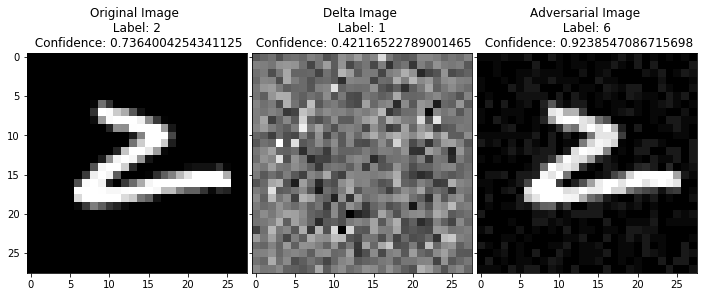

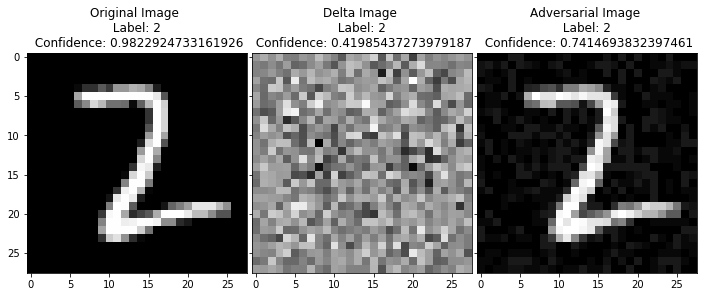

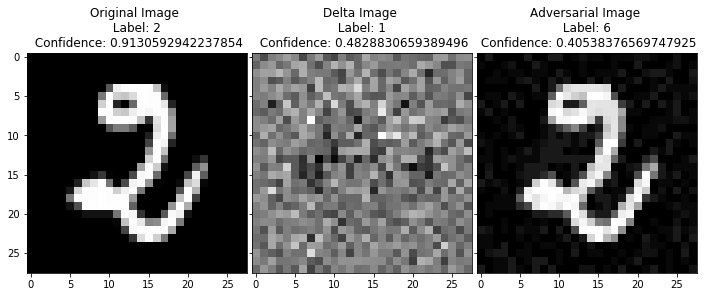

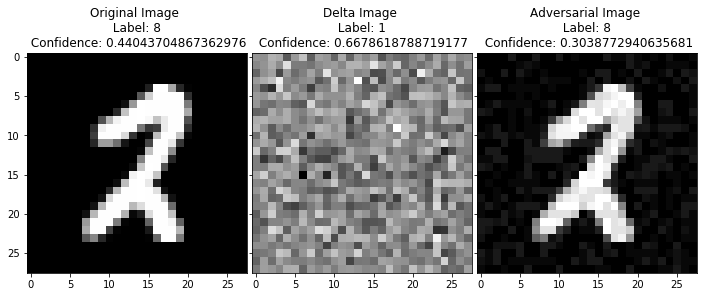

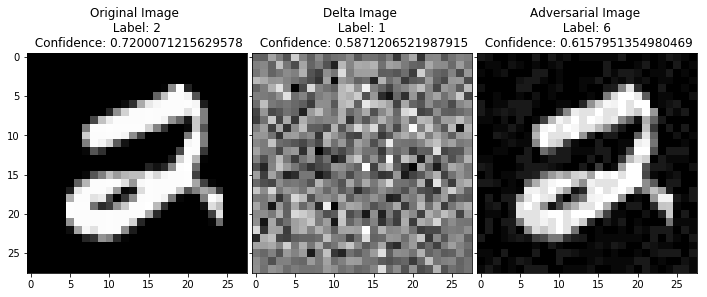

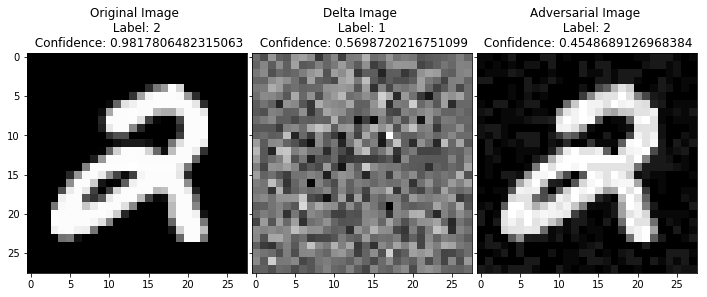

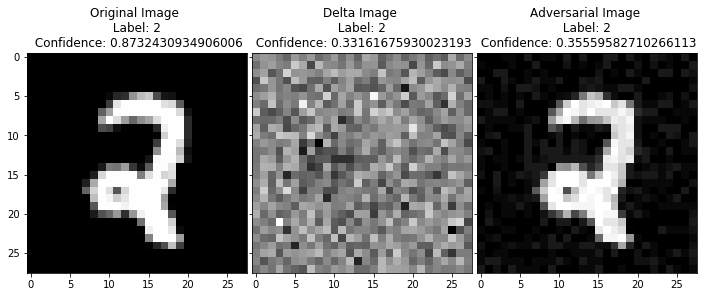

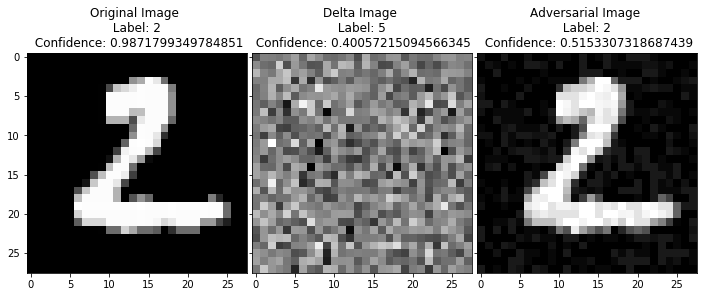

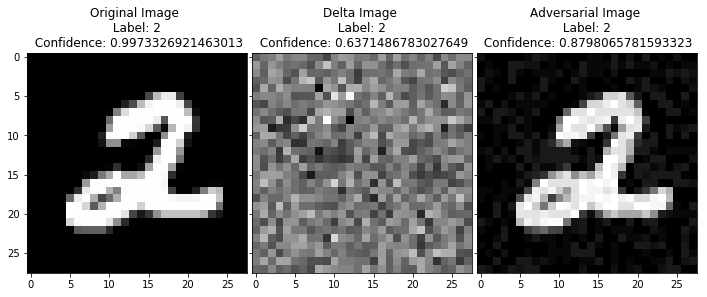

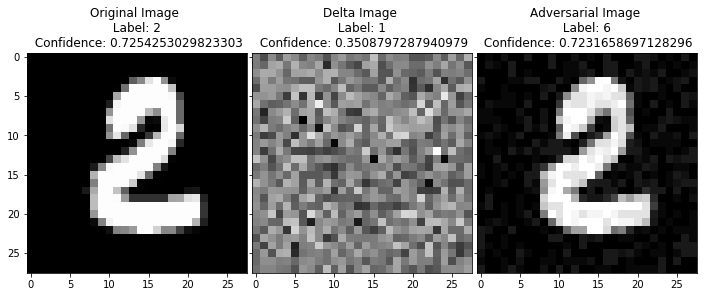

In [391]:
label_adv = [0,0,0,0,0,0,1,0,0,0]
for i in x_2_train_array[10:20]:
    x_image = create_plot_adversarial_images(i, label_adv, lr=0.1, n_steps=3)

I use the trained model to predict the delta images and many of them are predicted as digit 1 which is quite interesting. I notice that the learning rate and steps could influence the success rate on fooling the model. Therefore, I just plot them out.

## Additional Analysis

In [240]:
#generate training data of class of adversarial images of digit 2
def generate_training_data(x_image, y_label, lr=0.1, n_steps=1):
    x_image = np.reshape(x_image, (1, 784))
    
    original_image = x_image
    probs_per_step = []

    loss =  tf.nn.softmax_cross_entropy_with_logits(labels=y_label, logits=y_conv)
    deriv = tf.gradients(loss, x)
    image_adv = tf.stop_gradient(x - tf.sign(deriv)*lr/n_steps)
    image_adv = tf.clip_by_value(image_adv, 0, 1)
    
    for _ in range(n_steps):
        # Calculate derivative and adversarial image
        dydx = sess.run(deriv, {x: x_image, keep_prob: 1.0})
        x_adv = sess.run(image_adv, {x: x_image, keep_prob: 1.0})
        
        x_image = np.reshape(x_adv, (1, 784))
    
    return x_image

In [365]:
#test how the length of steps influence the success rate of fooling the model
from random import *

def test_steps(x_2_train_array, label_adv, steps_list, lr, n_images):
    dic = {}
    for i in tqdm(range(len(steps_list))):
        x_2_train_adv = []
        for j in tqdm(range(0, 10 + n_images)):
            tmp = generate_training_data(x_2_train_array[j], label_adv, lr=lr, n_steps = steps_list[i])
            x_2_train_adv.append(tmp[0])
            
        x_2_train_adv_array = np.asarray(x_2_train_adv)
        res = accuracy.eval(feed_dict={x:x_2_train_adv_array, y_: y_test_label, keep_prob: 1.0})
        dic[i] = res
    return dic

In [366]:
steps_list = [1,2,3,4,5,6,7,8,9]
n_images = 10
lr = 0.1

#the success rate of fooling the model with respect to the steps
dic = test_steps(x_2_train_array, label_adv, steps_list, lr, n_images)

In [367]:
dic

{0: 0.05, 1: 0.15, 2: 0.35, 3: 0.55, 4: 0.55, 5: 0.6, 6: 0.65, 7: 0.7, 8: 0.65}

In [378]:
def test_learning_rate(x_2_train_array, label_adv, n_steps, lr_list, n_images):
    dic = {}
    for i in range(len(lr_list)):
        x_2_train_adv = []
        for j in range(0, 10 + n_images):
            tmp = generate_training_data(x_2_train_array[j], label_adv, lr=lr_list[i], n_steps=n_steps)
            x_2_train_adv.append(tmp[0])
            
        x_2_train_adv_array = np.asarray(x_2_train_adv)
        res = accuracy.eval(feed_dict={x:x_2_train_adv_array, y_: y_test_label, keep_prob: 1.0})
        dic[lr_list[i]] = res
    return dic

In [381]:
n_steps = 7
lr_list = [0.05, 0.1, 0.2, 0.4, 0.6, 0.8]
lr_dic = test_learning_rate(x_2_train_array, label_adv, n_steps, lr_list, n_images)

In [385]:
lr_dic

{0.05: 0.05, 0.1: 0.65, 0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0}

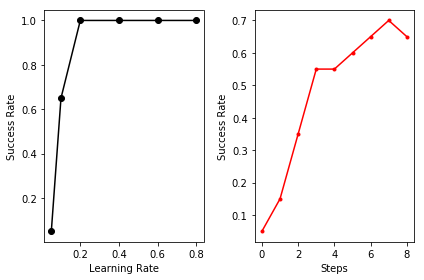

In [396]:
import matplotlib.pylab as plt

steps_res = sorted(dic.items())
lr_res = sorted(lr_dic.items())

x, y = zip(*lr_res)
m, n = zip(*steps_res)

plt.subplot(1, 2, 1)
plt.plot(x, y, 'ko-')
plt.xlabel('Learning Rate')
plt.ylabel('Success Rate')

plt.subplot(1, 2, 2)
plt.plot(m, n, 'r.-')
plt.xlabel('Steps')
plt.ylabel('Success Rate')

plt.tight_layout()
plt.show()

Using steps of 7, the success rate could go up to 70%! 